In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

# ИСХОДНЫЕ ДАННЫЕ

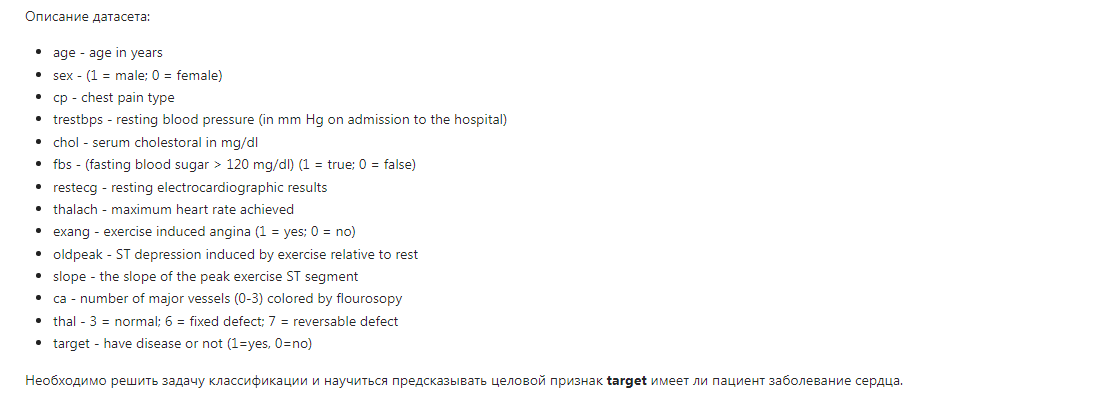

In [3]:
df = pd.read_table('data_lr3.txt', sep = ',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [9]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

выборка сбалансирована?

In [10]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

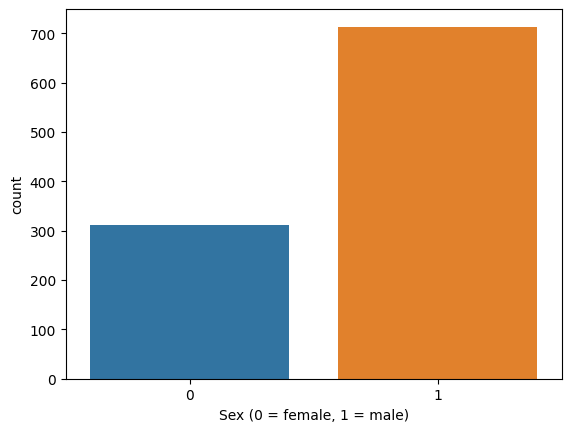

In [12]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [13]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


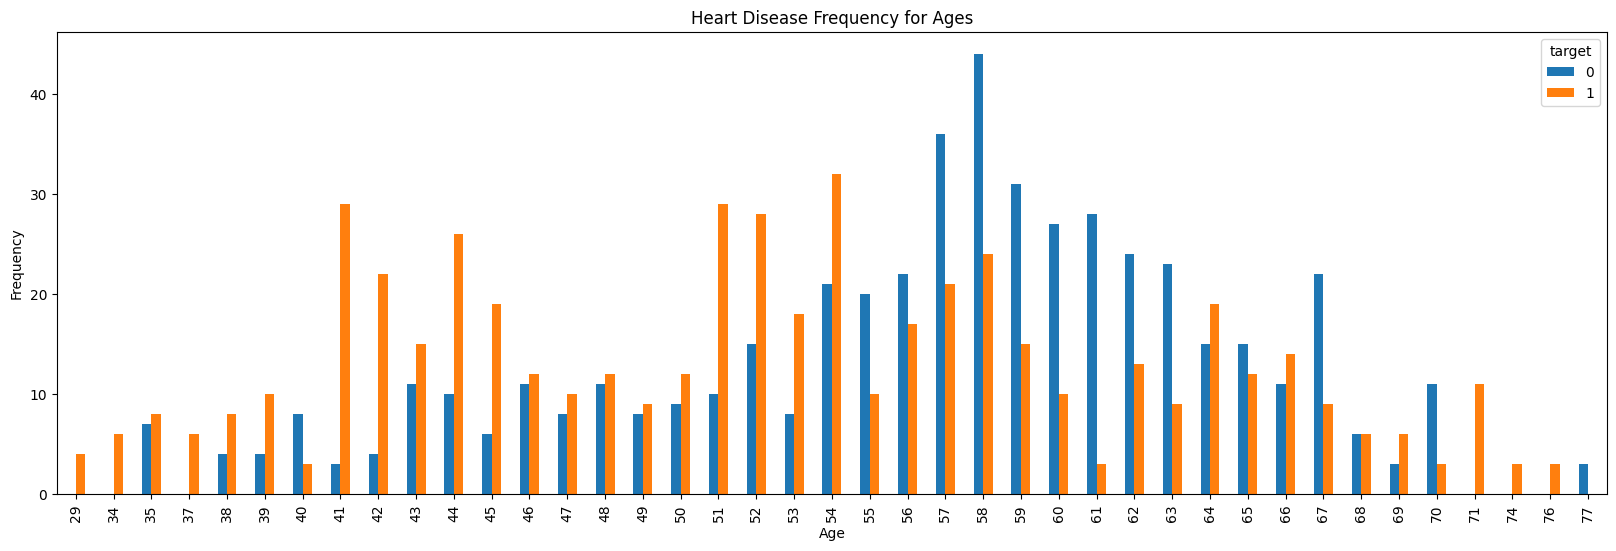

In [14]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


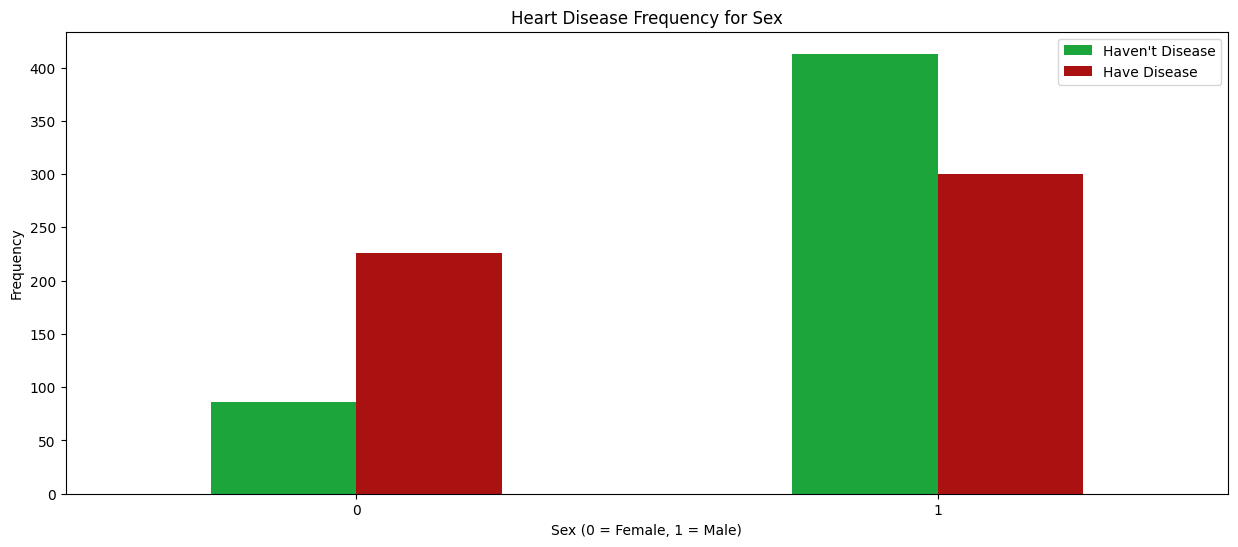

In [16]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

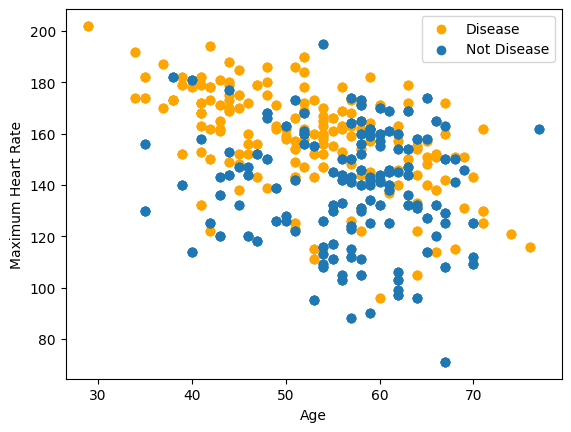

In [21]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="orange")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

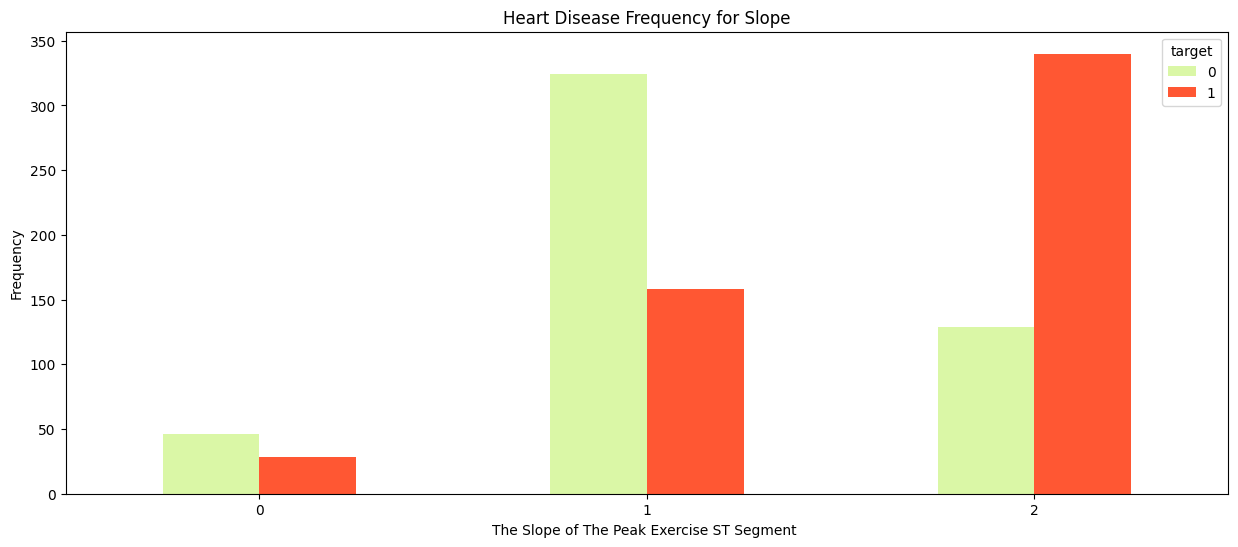

In [22]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

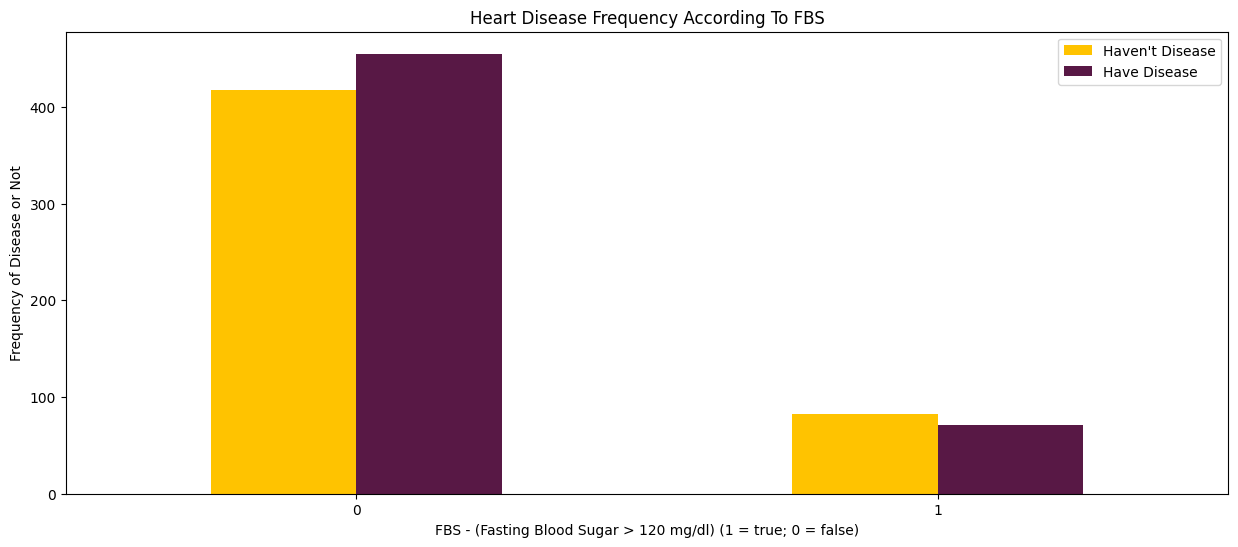

In [23]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

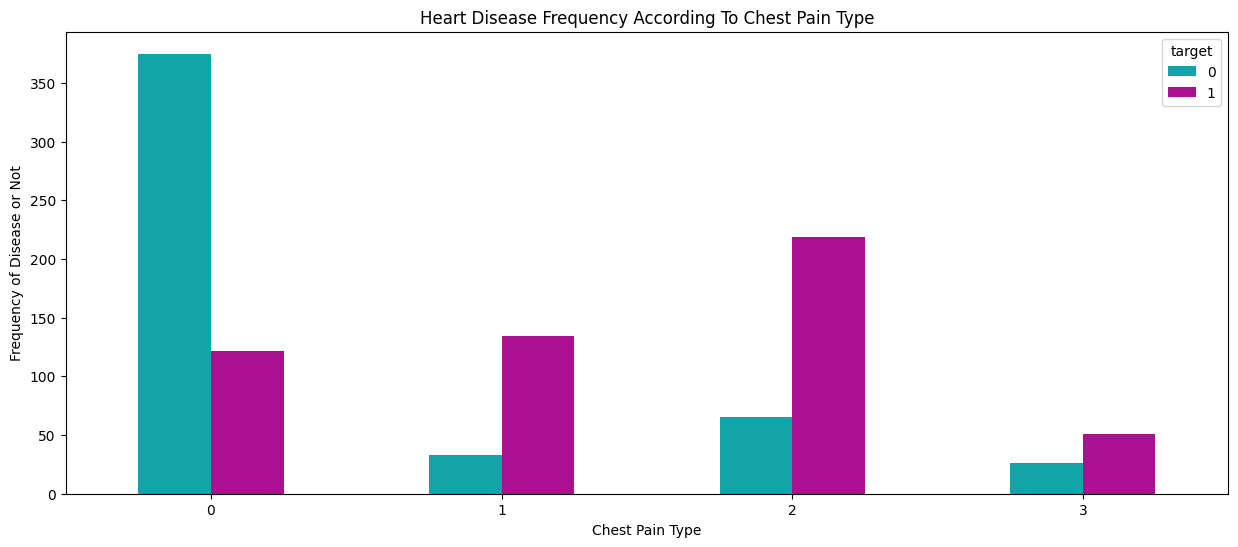

In [24]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [25]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [26]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
acc = lr.score(X_test_scaled, y_test)

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.4f}".format(acc))

Test Accuracy 0.8084


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(X_train_scaled, y_train)
prediction = knn.predict(X_test_scaled)

print("{} NN Score: {:.4f}".format(3, knn.score(X_test_scaled, y_test)))

3 NN Score: 0.9318


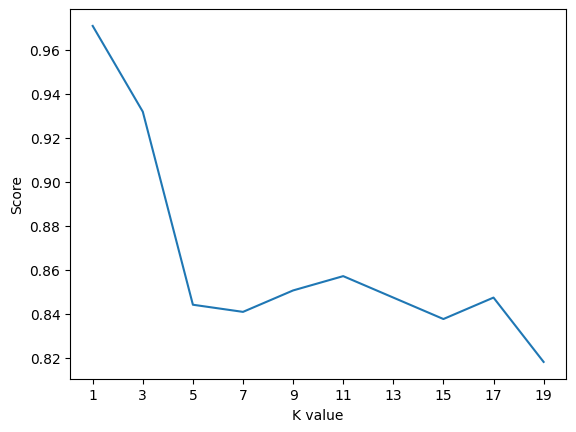

Maximum KNN Score is 0.9708


In [30]:
scoreList = []
for i in range(1, 20, 2):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train_scaled, y_train)
    scoreList.append(knn2.score(X_test_scaled, y_test))
    
plt.plot(range(1, 20, 2), scoreList)
plt.xticks(np.arange(1, 20, 2))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.4f}".format(acc))

In [31]:
from sklearn.svm import SVC

svm = SVC(random_state = 12)
svm.fit(X_train_scaled, y_train)

acc = svm.score(X_test_scaled, y_test)
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.4f}".format(acc))

Test Accuracy of SVM Algorithm: 0.8961


In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

acc = nb.score(X_test_scaled, y_test)
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.4f}".format(acc))

Accuracy of Naive Bayes: 0.6688


In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.4f}".format(acc))

Decision Tree Test Accuracy 0.9805


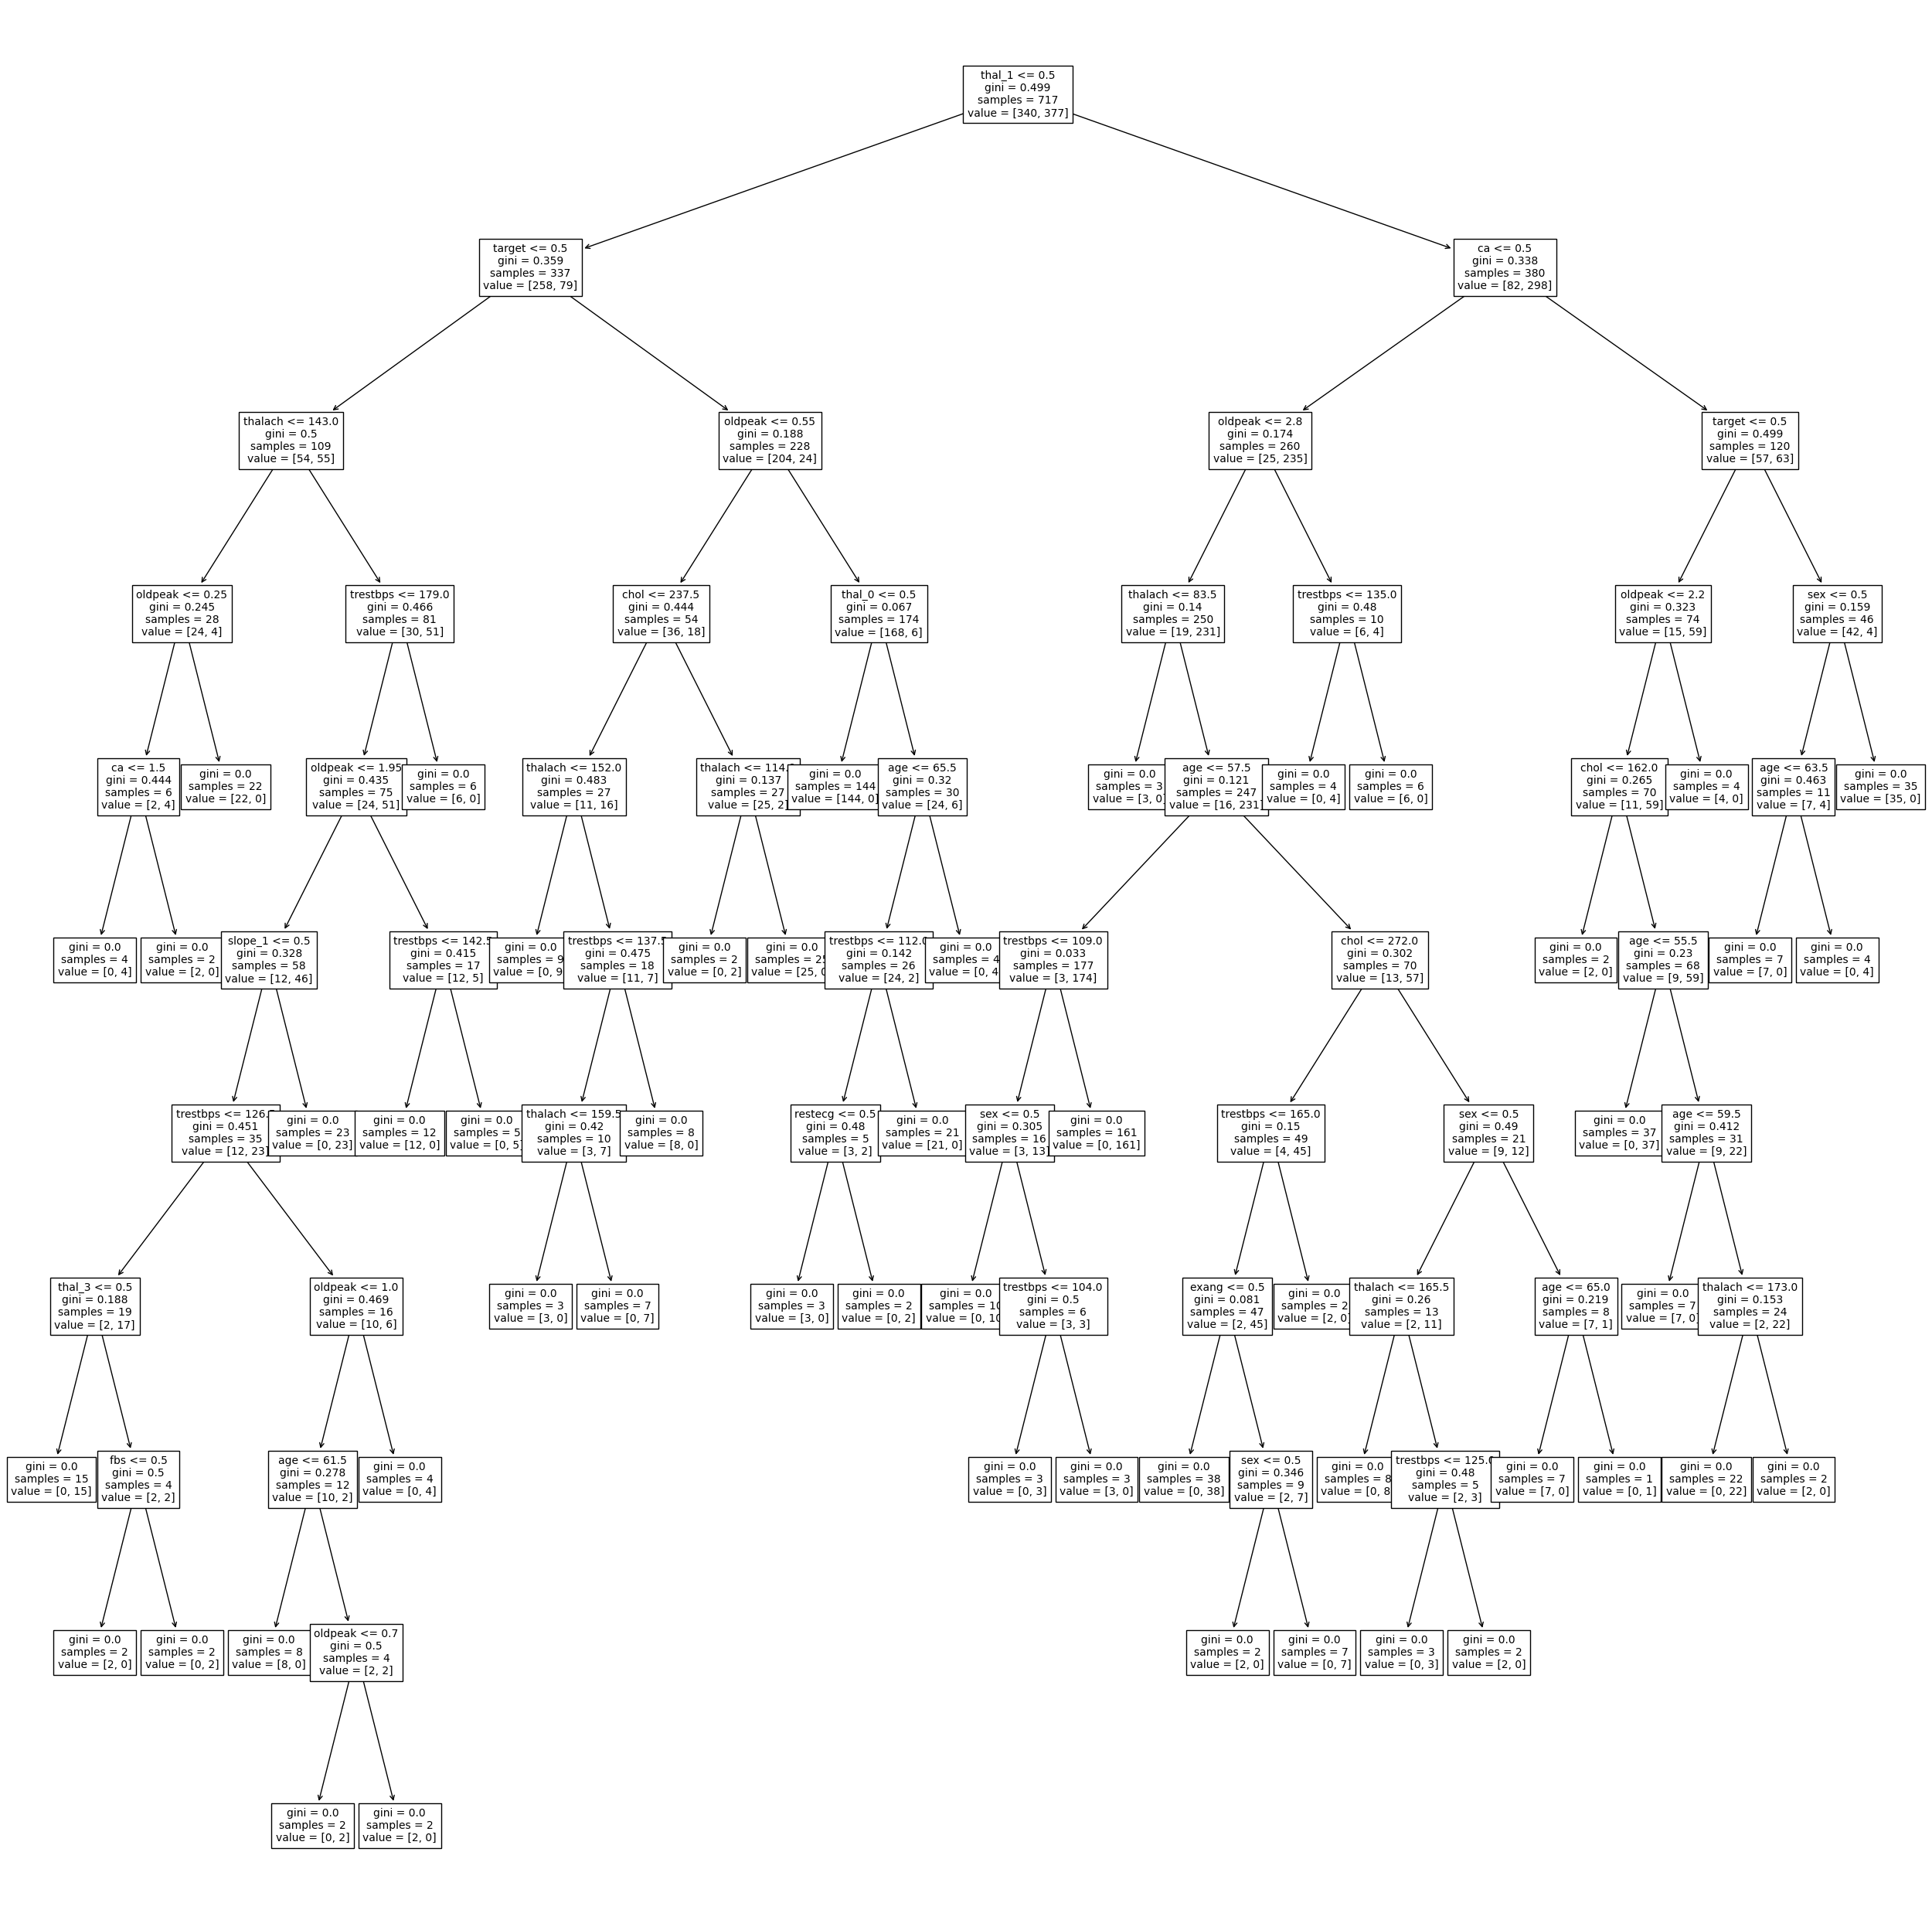

In [34]:
from sklearn import tree

plt.figure(figsize=(32, 32))
tree.plot_tree(dtc, feature_names=df.columns,fontsize=10);

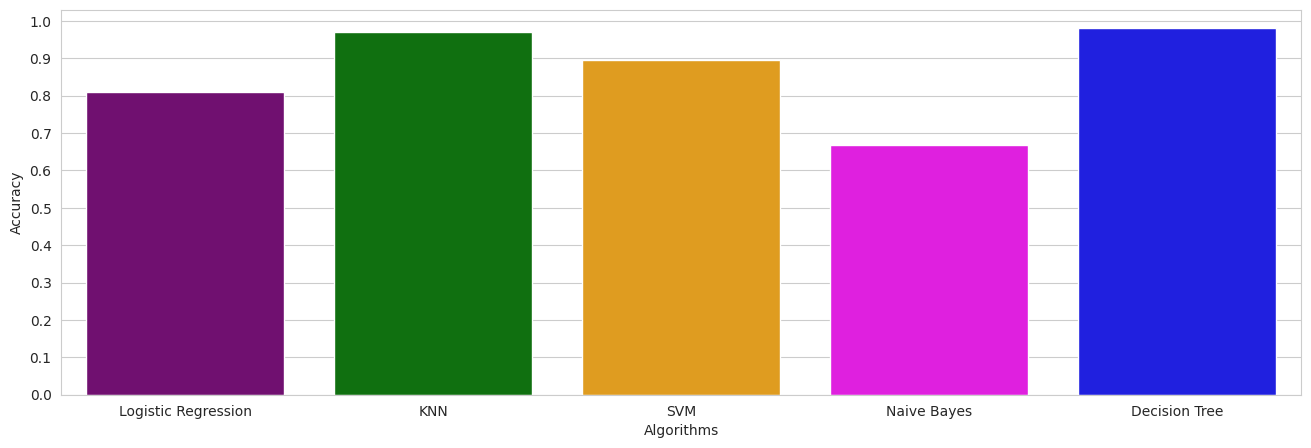

In [35]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [36]:
# Predicted values
y_head_lr = lr.predict(X_test_scaled)
knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(X_train_scaled, y_train)
y_head_knn = knn3.predict(X_test_scaled)
y_head_svm = svm.predict(X_test_scaled)
y_head_nb = nb.predict(X_test_scaled)
y_head_dtc = dtc.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

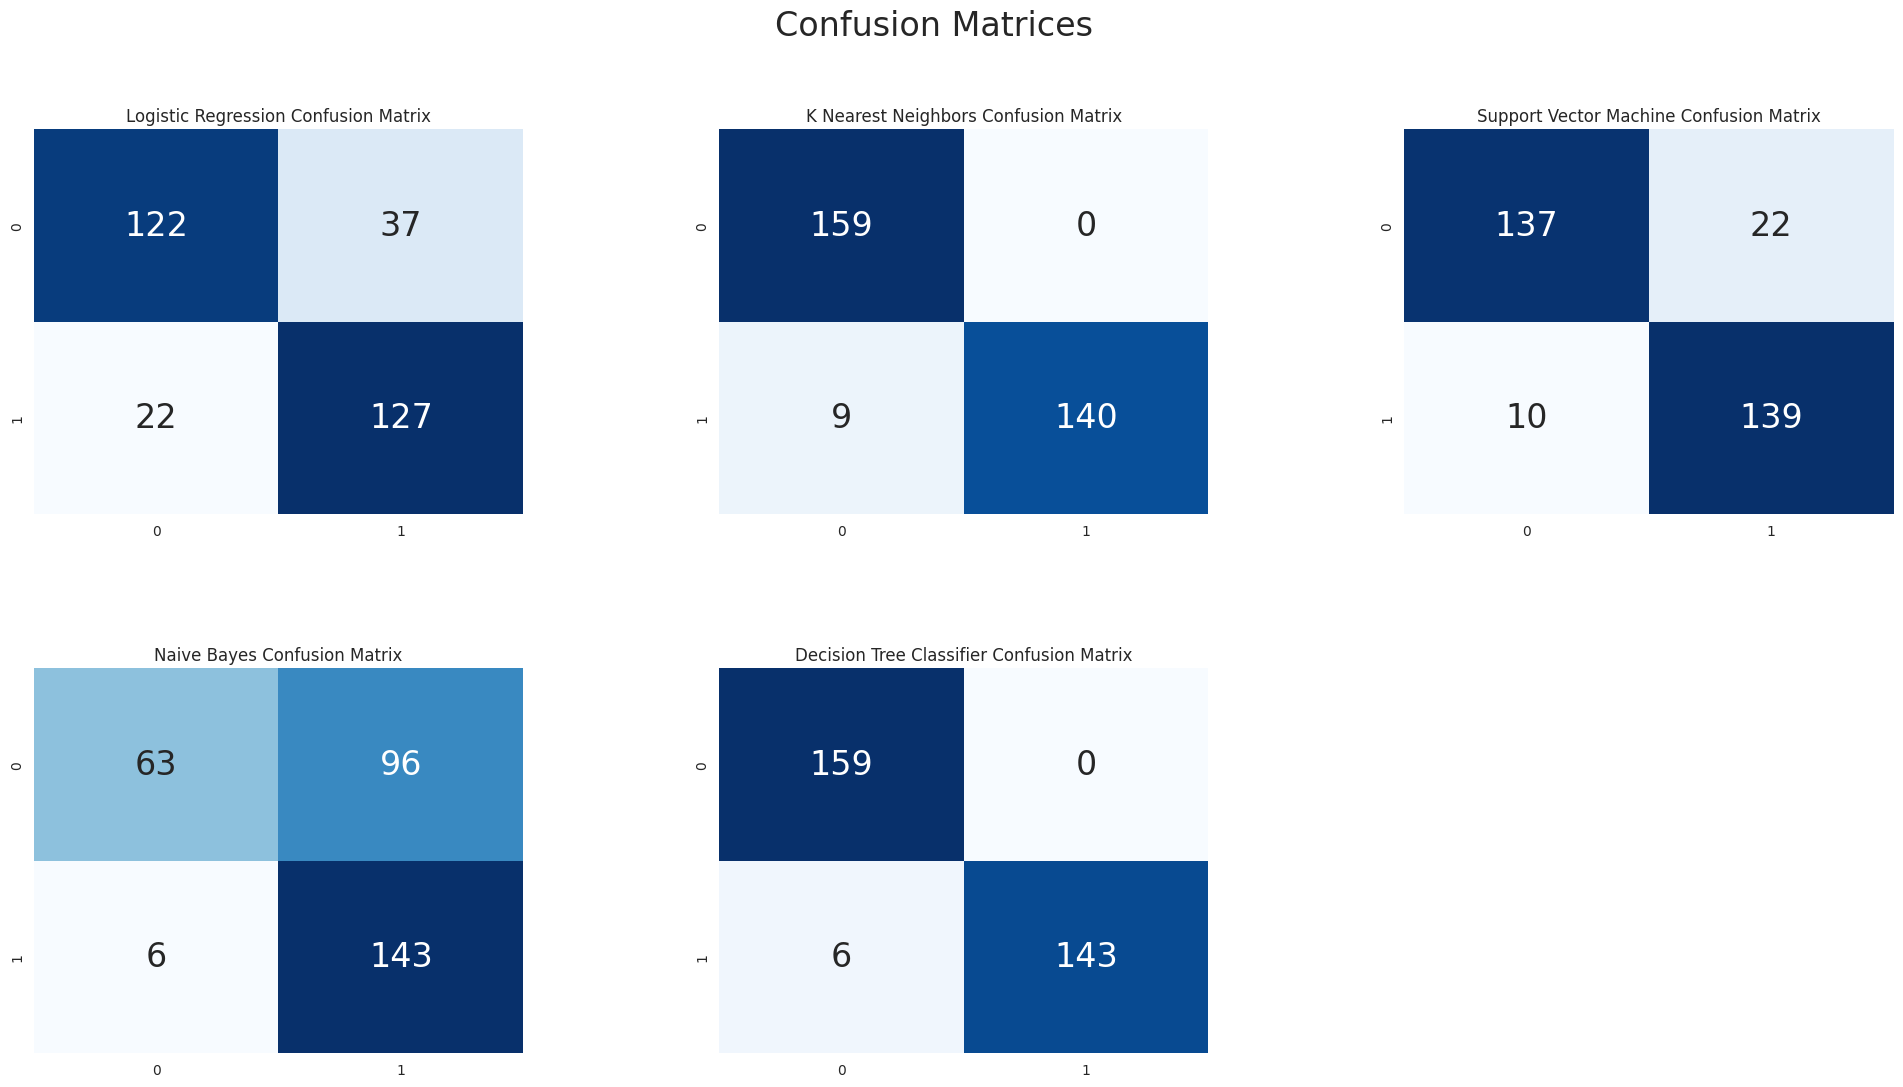

In [38]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

# **СВОИ ДАННЫЕ**

Не хотела сильно париться, поэтому взяла датасет одной из лаб по Анализу Данных с Аббакумов В.Л.: будем рассматривать классификацию вин 

Измеряются 13 характеристик химического состава вина. Необходимо по значениям имеющихся переменных определить тип вина.

Имеются результаты химического анализа трех сортов вина, grown in the same region in Italy but derived from three different cultivars. Сорт вина указан в трех столбцах класс_1, класс_2 и класс_3. Если в первом столбце (класс_3) стоит единица, то наблюдение соответствует виду вина
третьего типа, если во втором столбце (класс_2) стоит единица, то наблюдение соответствует виду вина второго типа, если в третьем столбце (класс_1) стоит единица, то наблюдение соответствует виду вина первого типа. Таким образом, столбцы дублируют друг друга. 

Задача приобрела большую известность и активно обсуждалась. Как оказалось, статистические методы могут различать вина лучше опытного профессионального знатока вин (сомелье). Эффект после начальной публикации оказался хоть и ниже, чем от проигрыша Каспаровым (на тот момент чемпионом
мира) матча шахматной программе Дип Блю» (Deep Blue) но тем не менее сопоставимым.

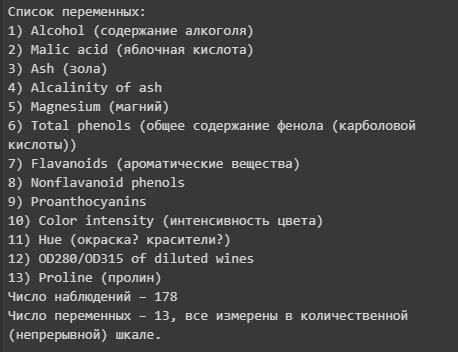

In [48]:
df = pd.read_csv('Wine.txt', sep='\t')

In [49]:
df.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [50]:
#  Проверяю размерность матрицы данных
df.shape

(178, 14)

In [51]:
#  Классы сбалансированы?
df['Desired1(3)'].value_counts()

2    71
0    59
1    48
Name: Desired1(3), dtype: int64

In [59]:
df.isna().any()

Input1         False
Input2         False
Input3         False
Input4         False
Input5         False
Input6         False
Input7         False
Input8         False
Input9         False
Input10        False
Input11        False
Input12        False
Input13        False
Desired1(3)    False
dtype: bool

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Input1       178 non-null    float64
 1   Input2       178 non-null    float64
 2   Input3       178 non-null    float64
 3   Input4       178 non-null    float64
 4   Input5       178 non-null    int64  
 5   Input6       178 non-null    float64
 6   Input7       178 non-null    float64
 7   Input8       178 non-null    float64
 8   Input9       178 non-null    float64
 9   Input10      178 non-null    float64
 10  Input11      178 non-null    float64
 11  Input12      178 non-null    float64
 12  Input13      178 non-null    int64  
 13  Desired1(3)  178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [61]:
df.isnull().any()

Input1         False
Input2         False
Input3         False
Input4         False
Input5         False
Input6         False
Input7         False
Input8         False
Input9         False
Input10        False
Input11        False
Input12        False
Input13        False
Desired1(3)    False
dtype: bool

посмотрим на распределения и основные описательные характеристики

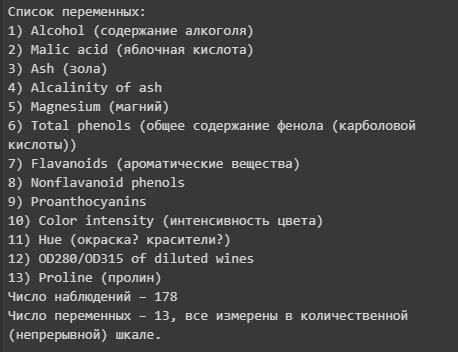

In [62]:
df.describe()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.067416
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.854338
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [52]:
#  разделяю предикоторы и отклики
X = df.iloc[:, :-1].values  
y = df.iloc[:, 13].values  

# Дерево

In [46]:
#  Импортируем класс
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Активируем поиск на решетке GridSearchCV
from sklearn.model_selection import GridSearchCV

In [54]:
# Инициализируем модель
model_2 = DecisionTreeClassifier(random_state=42,
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=6,
                               max_leaf_nodes=None,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=10,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=8,
                               min_impurity_decrease=0.001,
                               class_weight=None,                             
                               splitter='best',
                               max_features = None)

In [55]:
#   Определяем интересные значения гиперпараметров
params_set = {
'max_depth': [3, 4, 6],
'min_samples_leaf': [2, 4, 8],
'min_samples_split': [8, 10, 14]
}


#   Проводим 5-fold кросс-валидацию
#   Качество моделей сравниваем с помощью accuracy, так как классы сбалансированы
grid_CV_1 = GridSearchCV(estimator=model_2,
       param_grid=params_set,
       scoring='accuracy',
       cv=5,
       n_jobs=-1)


#   Обучение на обучающей выборке
grid_CV_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6,
                                              min_impurity_decrease=0.001,
                                              min_samples_leaf=8,
                                              min_samples_split=10,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 6], 'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [8, 10, 14]},
             scoring='accuracy')

In [56]:
#   Лучший набор значений гиперпараметров

best_hyperparams = grid_CV_1.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 8}


In [57]:
# Значение критерия качества для лучших значений гиперпараметров 
best_CV_score = grid_CV_1.best_score_
print('Лучшее accuracy', best_CV_score)

Лучшее accuracy 0.8492753623188406


In [58]:
# Лучшая модель
best_model = grid_CV_1.best_estimator_

# accuracy на тестовом множестве для лучшей модели
test_acc = best_model.score(X_test,y_test)

# Значение критерия качества для лучших значений гиперпараметров 
print('Лучшее accuracy на тестовом множестве', test_acc)

Лучшее accuracy на тестовом множестве 0.864406779661017


# **Логрег**

In [63]:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)  

In [69]:
#  Стандартизация предикторов

from sklearn.preprocessing import StandardScaler   #   среднее 0, ст.отклонение 1
#  from sklearn.preprocessing import MinMaxScaler  #  к интервалу [0,1]

scaler = StandardScaler()   #   среднее 0, ст.отклонение 1

scaler.fit(X_train)

#  Важно: одинаковые параметры стандартизации 

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test)  

In [ ]:
X

In [ ]:
y

In [67]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = lr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train) 
acc = grid_search.best_score_

accuracies['Logistic Regression GRD'] = acc
print("Test best parameters {0}".format(grid_search.best_params_))
print("Test Accuracy {:.4f}".format(acc))


Test best parameters {'penalty': 'l2'}
Test Accuracy 0.9326


In [119]:
from sklearn.linear_model import LogisticRegression
accuracies = {}

lr0 = LogisticRegression(penalty = 'l2')
lr0.fit(X_train_2, y_train)
acc0 = lr0.score(X_test_2, y_test)

accuracies['Logistic Regression'] = acc0
print("Test Accuracy {:.4f}".format(acc0))

Test Accuracy 0.9831


# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [70]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 13))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_2, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [71]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy на обучающей выборке  : {:.2f}%".format(accuracy) )

{'n_neighbors': 3}
Accuracy на обучающей выборке  : 95.83%


In [73]:
classifier0 = KNeighborsClassifier(n_neighbors=3)  
classifier0.fit(X_train_2, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [74]:
#  Используем классификатор на обучающей и тестовой выборках

y_pred_train = classifier0.predict(X_train_2)  
y_pred_test = classifier0.predict(X_test_2)  


In [75]:
print('Accuracy на обучающей выборке', accuracy_score(y_train, y_pred_train, normalize=True))
print(classification_report(y_train, y_pred_train)) 

Accuracy на обучающей выборке 0.9747899159663865
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       0.97      0.97      0.97        33
           2       0.98      0.96      0.97        45

    accuracy                           0.97       119
   macro avg       0.97      0.98      0.97       119
weighted avg       0.97      0.97      0.97       119



In [76]:
print('Accuracy на тестовой выборке : ', accuracy_score(y_test, y_pred_test, normalize=True))
print(classification_report(y_test, y_pred_test))  

Accuracy на тестовой выборке :  0.9322033898305084
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       0.94      1.00      0.97        15
           2       1.00      0.85      0.92        26

    accuracy                           0.93        59
   macro avg       0.93      0.95      0.94        59
weighted avg       0.94      0.93      0.93        59



In [77]:

print(u'Таблица сопряженности для обучающей выборки')
print(confusion_matrix(y_train, y_pred_train))  

Таблица сопряженности для обучающей выборки
[[41  0  0]
 [ 0 32  1]
 [ 1  1 43]]


In [78]:
print(u'Таблица сопряженности для тестовой выборки')
print(confusion_matrix(y_test, y_pred_test))  

Таблица сопряженности для тестовой выборки
[[18  0  0]
 [ 0 15  0]
 [ 3  1 22]]


# SVM

In [ ]:

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_2, y_train)

In [80]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)


In [81]:
grid_predictions = grid.predict(X_test_2)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      1.00      1.00        15
           2       1.00      0.96      0.98        26

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



In [ ]:
# 'C': 1, 'gamma': 0.01, 'kernel': 'rbf'
# SVC(C=1, gamma=0.01)

In [82]:
from sklearn.svm import SVC

svm = SVC(C = 1.0, kernel = 'rbf', gamma=0.01, random_state = 69)
svm.fit(X_train_2, y_train)

acc = svm.score(X_test_2, y_test)
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.4f}".format(acc))

Test Accuracy of SVM Algorithm: 0.9831


Так, это уже третье аккураси за 90, я сама в это не очень верю, поэтому если вы найдете ошибку и сообщите мне, что я сделала не так - я буду очень благодарна)) А пока продолжу пытать бедный датасет и Байеса.

# Байес

In [ ]:
# defining parameter range
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
  
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_nb.fit(X_train_2, y_train)

In [84]:

# print best parameter after tuning
print(grid_nb.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_nb.best_estimator_)

{'var_smoothing': 0.3511191734215131}
GaussianNB(var_smoothing=0.3511191734215131)


In [85]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(var_smoothing=0.3511191734215131)
nb.fit(X_train_2, y_train)

acc = nb.score(X_test_2, y_test)
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.4f}".format(acc))

Accuracy of Naive Bayes: 0.9322


# СРАВНИВАЕМ ТО, ЧТО ЕСТЬ

Наивный Байес = 0.9322

Дерево = 0.86

Логрег = 0.9326

KNN = 0.93

SVM = 0.9831



In [86]:
ac_nb = 0.9322
ac_tree = 0.86
ac_logreg =  0.9326
ac_knn = 0.93
ac_svm = 0.9831

In [88]:
acc_list = list()

In [90]:
acc_list.append(ac_nb)
acc_list.append(ac_tree)
acc_list.append(ac_logreg)
acc_list.append(ac_knn)
acc_list.append(ac_svm)

In [102]:
data = pd.DataFrame(acc_list, columns = ['Accuracy'], index = ['NB','Tree','LogReg','KNN','SVM'])
data

,Accuracy
NB,0.9322
Tree,0.8600
LogReg,0.9326
KNN,0.9300
SVM,0.9831


In [95]:
import seaborn as sns

<Axes: ylabel='Accuracy'>

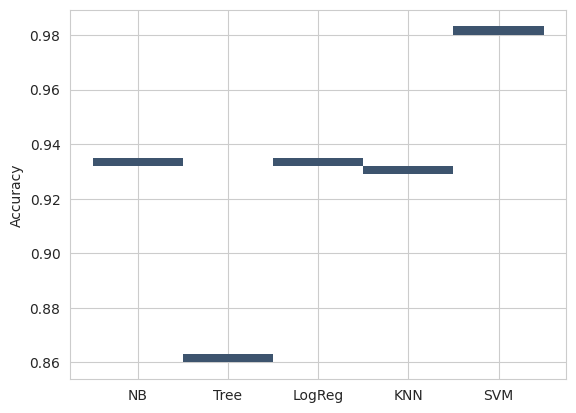

In [114]:
sns.histplot(data, x = data.index, y="Accuracy")

Видим, что лучше всего отработала Svm, примерно одинаковыми получились результаты у регрессии, метода ближайшего и байеса. Хуже всех отработало дерево.



# МАТРИЦА

In [120]:
# Predicted values
y_head_lr = lr0.predict(X_test_2)
y_head_knn = classifier0.predict(X_test_2) 
y_head_svm = svm.predict(X_test_2)
y_head_nb = nb.predict(X_test_2)
y_head_dtc = best_model.predict(X_test_2)

In [121]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

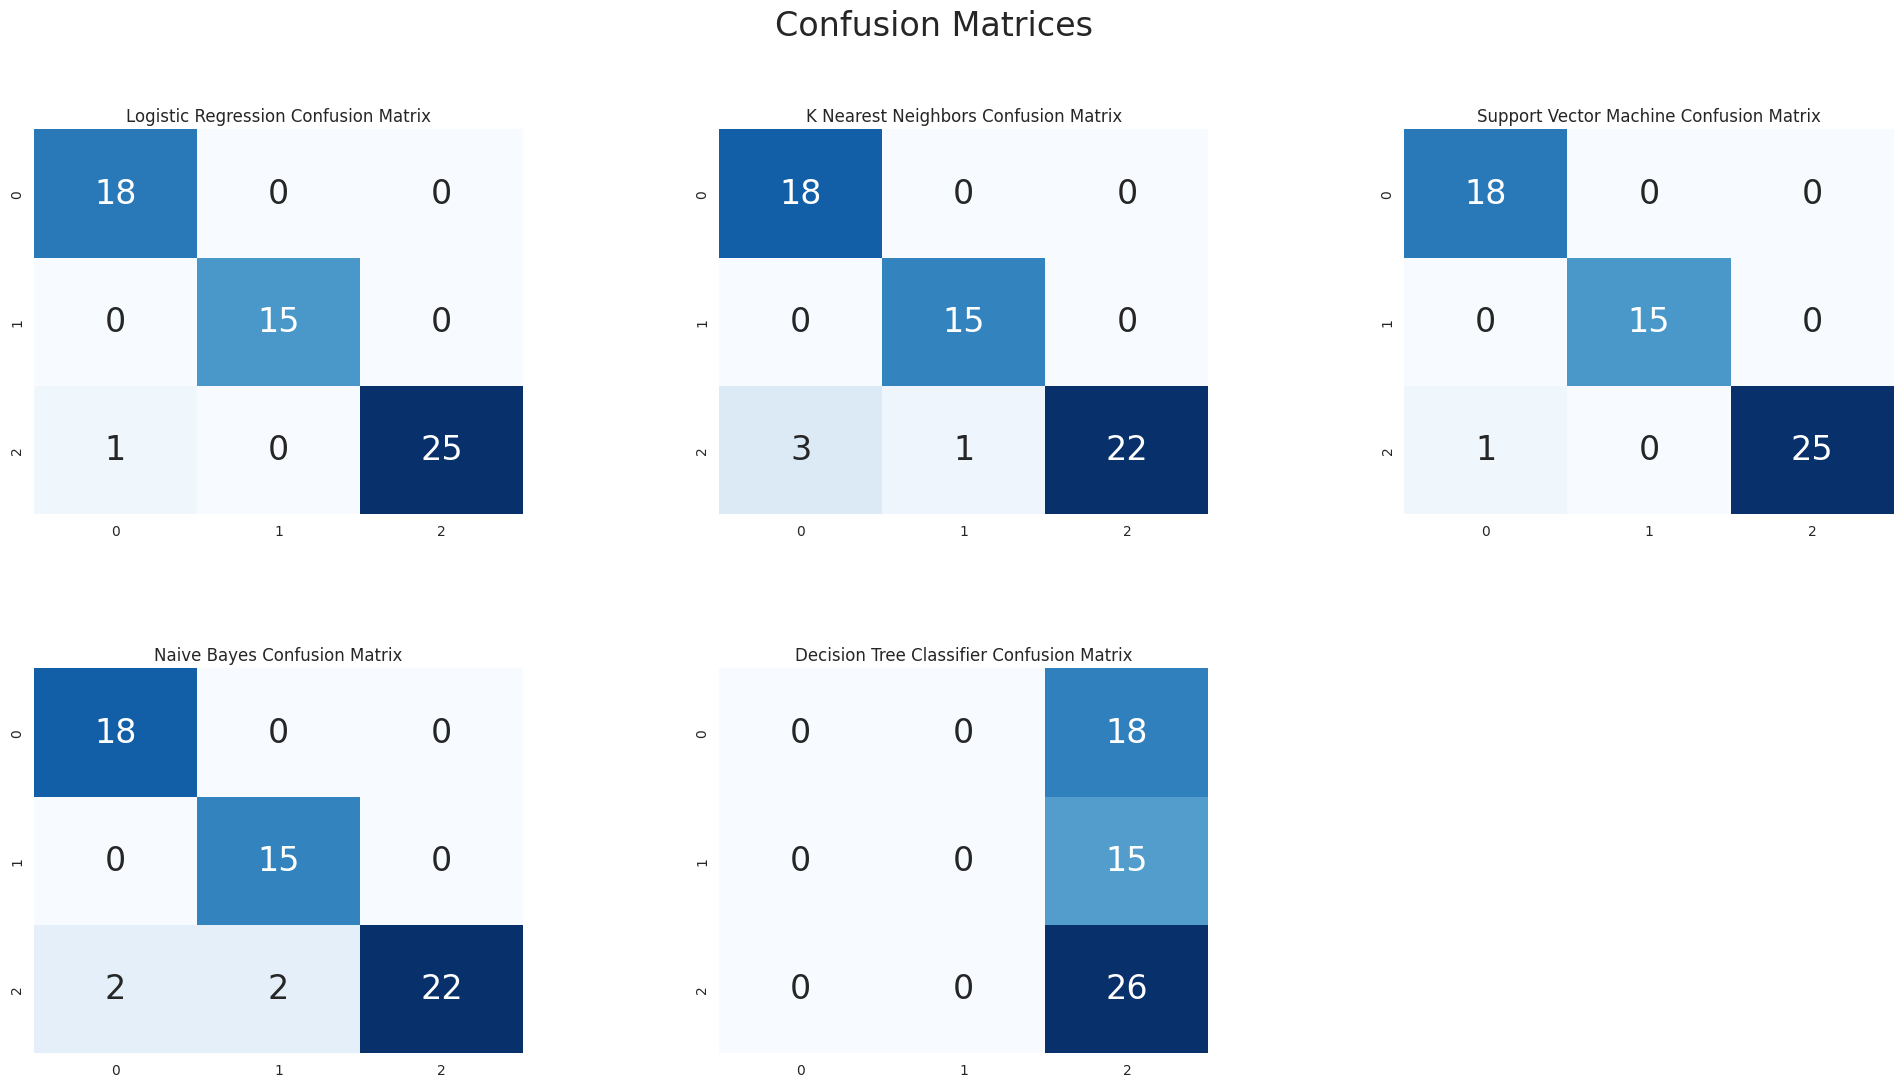

In [122]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

# Реализация KNN

В этой реализации класс KNN имеет приватные методы _predict и _euclidean_distance. Метод _euclidean_distance вычисляет Евклидово расстояние между двумя точками, а метод _predict предсказывает метку класса для нового наблюдения x.

Метод fit задает обучающие данные (матрицу признаков X_train и метки классов y_train), а метод predict предсказывает метки классов для новых наблюдений X. Метод accuracy_score вычисляет точность классификации на тестовых данных.

In [134]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def accuracy_score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        return accuracy


In [135]:
clf = KNN(k=3)

# fit the classifier on the training data
clf.fit(X_train_2, y_train)

# predict labels for the test data
y_pred = clf.predict(X_test_2)

# calculate accuracy score
accuracy = clf.accuracy_score(X_test_2, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9322033898305084


Точность примерно такая же, как у реализации sklearn

confusion matrix:

In [136]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[18  0  0]
 [ 0 15  0]
 [ 3  1 22]]


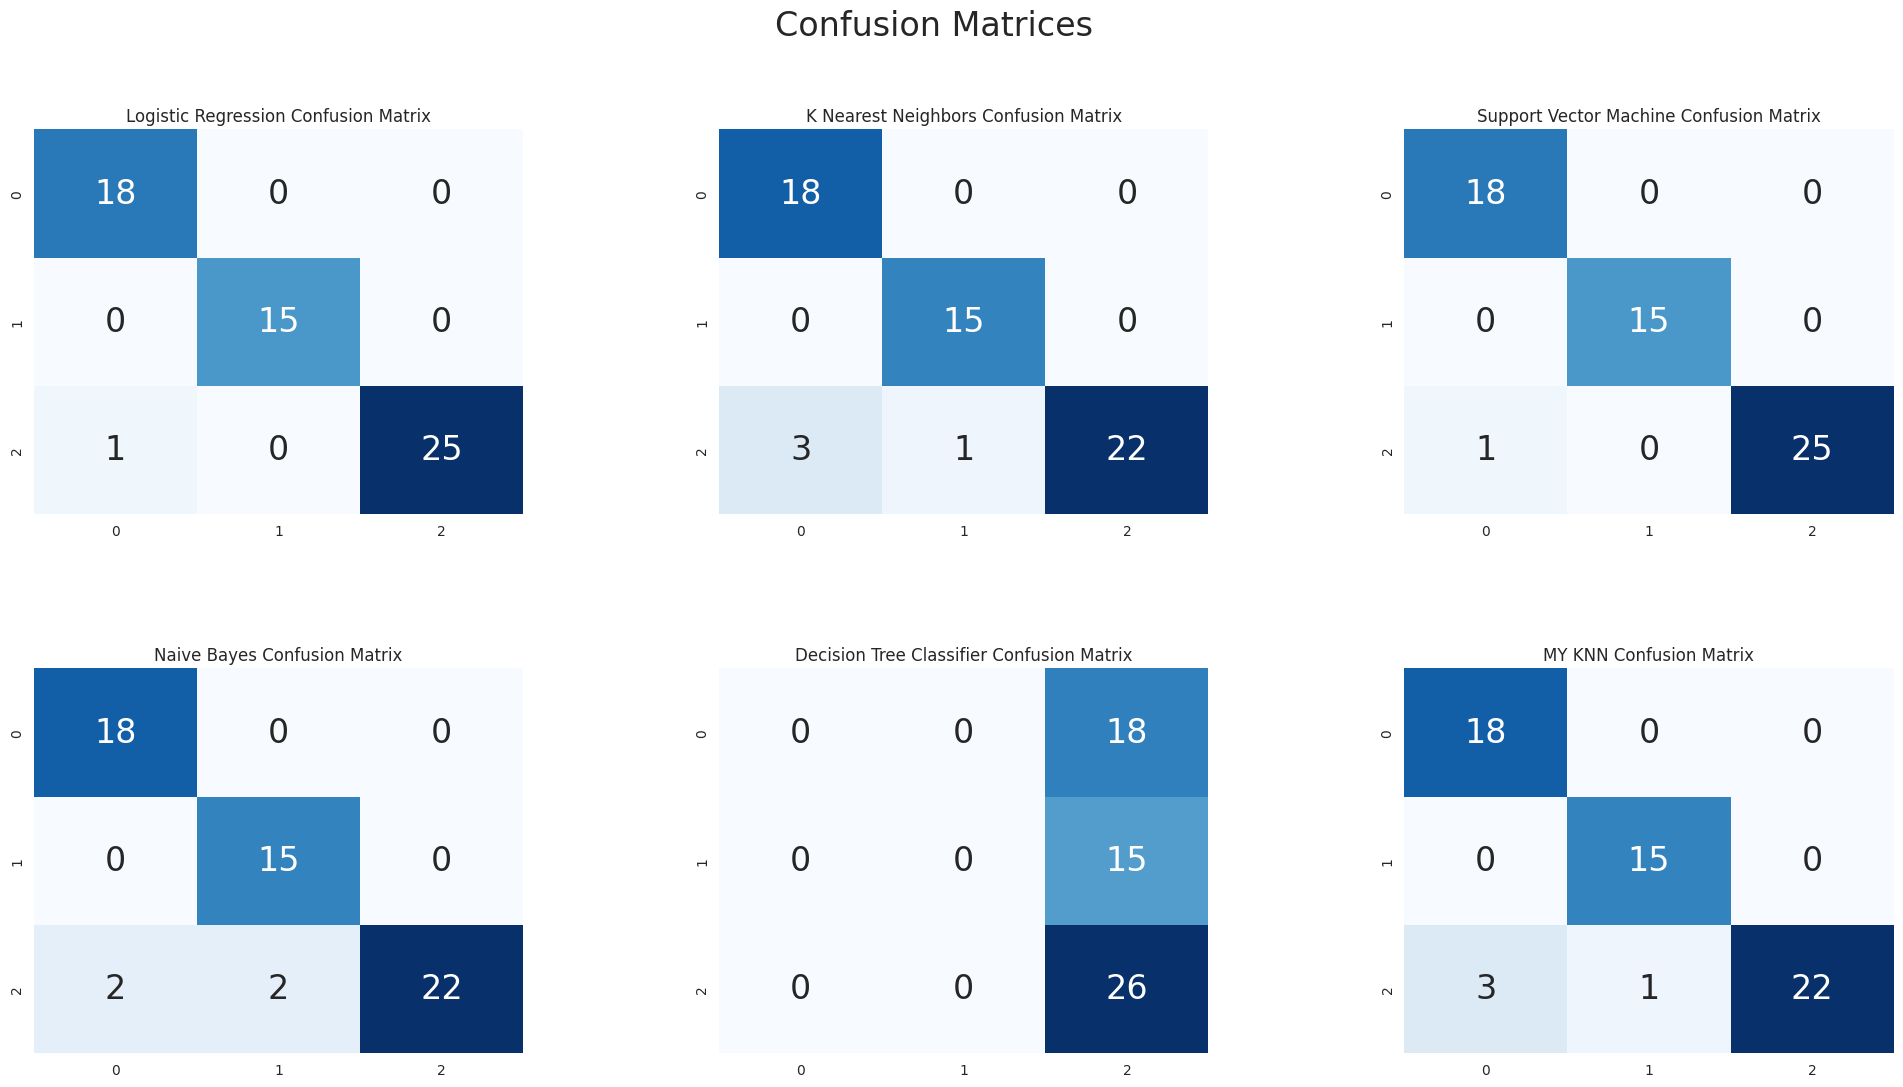

In [137]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("MY KNN Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()